# helper functions
https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/driver_examples/Qcodes%20example%20with%20Rohde%20Schwarz%20ZNB.ipynb 

In [ ]:
import os, sys
import matplotlib.pyplot as plt
import qcodes as qc
import numpy as np
from datetime import datetime, timedelta


#import instrument
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB

from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id, load_by_id
from qcodes.dataset.data_export import get_data_by_id


#Analysis
#from characterizations.characterizations import resonators as res
#from characterizations.characterizations.fitter import fit

In [ ]:
%matplotlib inline

In [ ]:
#initialize database
import datetime

def initialize_database(datestamp='20190602', dataset_name = 'ABS_W1_5_1_1', path=r'D:\OneDrive\BF3\Data\\'):
    """
    Quick helper function that sets the database
    """
    qc.config["core"]["db_location"] = datetime.date.today().strftime(path+datestamp+'_'+dataset_name+'.db')
    qc.dataset.database.initialise_database()
    print("database set to",qc.config.core.db_location)

In [ ]:
#initialize database
initialize_database('20190602')

In [ ]:
def get_f0s_from_data(data_id):
    data = load_by_id(data_id)
    freqs = np.squeeze(np.array(data.get_data('frequency')))
    mag = np.squeeze(np.array(data.get_data('magnitude_dB')))
    amp = np.squeeze(np.array(data.get_data('mag')))
    phase = np.squeeze(np.array(data.get_data('phase')))
    #gates = np.squeeze(np.array(data.get_data('V_cut_A')))

    f0s = freqs[1,np.argmin(mag[:,:],axis=1)]
    return f0s

def unpack_data(data_id, col_names = ['frequency', 'mag', 'phase', 'magnitude_dB']):
    """ 
    Just loads the data from database to numpy arrays
    specifying columns with the list arguments
    """
    data = load_by_id(data_id)
    data_dict = {}
    for col_name in col_names:
        data_dict[col_name] = np.squeeze(np.array(data.get_data(col_name))) #somehow they added empty dimensions in qcodes. or maybe that is just my bad saving 
    
    return data_dict

def plot_readout_point_from_sweep(plot_id, f_readout = 4.84700e9):
    """
    plots readout point in mag vs phase resonance sweep. 
    """
    dat = unpack_data(plot_id, col_names=['frequency', 'phase', 'magnitude_dB', 'magnitude_raw'])
    plt.figure()
    plt.plot(dat['frequency'],dat['magnitude_raw'], '--')
    plt.ylabel('mag')
    plt.twinx()
    plt.plot(dat['frequency'],dat['phase'], '--g')
    plt.axvline(x=f_readout,color='r')
    plt.title('Readout point sweep for sweep #%d, id=#%d' % (plot_id+1, plot_id))
    plt.ylabel('phase')

# frequency analysis of field scans

In [ ]:
def plot_fft(data_id):
    data = unpack_data(data_id, col_names = ['B_y', 'mag', 'phase'])
    plt.figure(figsize=(15,4))
    plt.plot( np.fft.fftfreq(len(data['mag']), d=(data['B_y'][1]-data['B_y'][0])),np.abs(np.fft.fft(data['mag'])))
    plt.ylim(0,1)
    
def get_fft(data_id, imin=0, imax=-1):
    data = unpack_data(data_id, col_names = ['B_y', 'mag', 'phase'])
    freqs = np.fft.fftfreq(len(data['mag'][imin:imax]), d=(data['B_y'][1]-data['B_y'][0]))
    mag_fft = np.abs(np.fft.fft(data['mag'][imin:imax]))
    phase_fft = np.abs(np.fft.fft(data['phase'][imin:imax]))
    return freqs, mag_fft, phase_fft
   

## 0602 data

In [720]:
initialize_database('20190602')

database set to D:\OneDrive\BF3\Data\\20190602_ABS_W1_5_1_1.db


([<matplotlib.axes._subplots.AxesSubplot at 0x170589e2a20>,
  <matplotlib.colorbar.Colorbar at 0x17059c5ab70>])

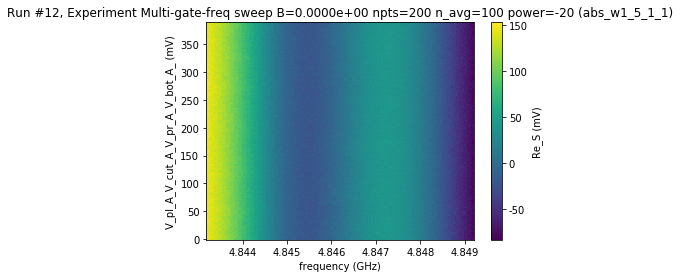

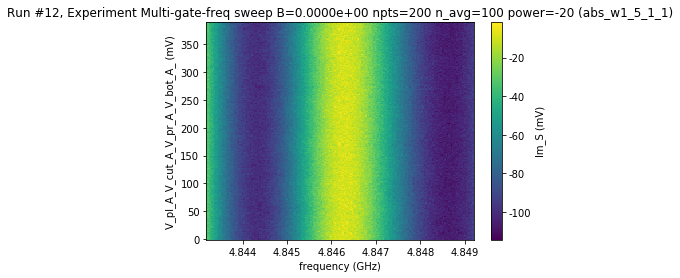

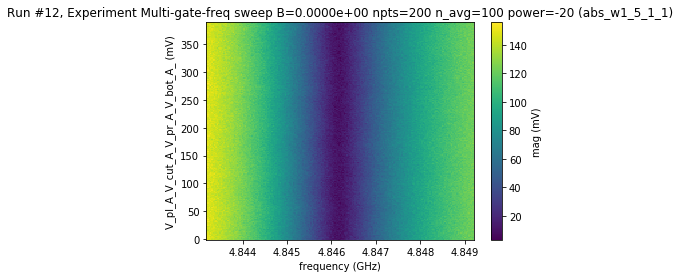

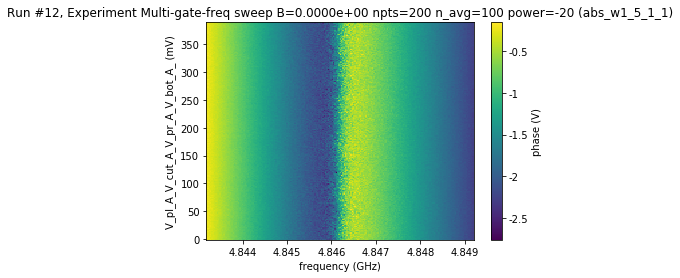

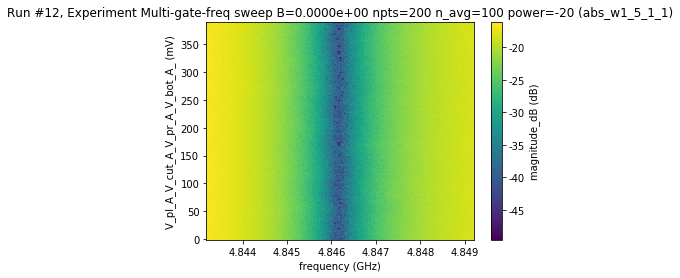

In [711]:
plot_by_id(12)

In [712]:
dat_unpack = unpack_data(12)


In [725]:
dat = unpack_data(20)
plt.figure()
plt.plot(dat['frequency'][0,:], dat['magnitude_dB'][0,:])
plt.figure()
plt.plot(dat['frequency'][0,:], dat['phase'][0,:])

Rolling back due to unhandled exception
Traceback (most recent call last):
  File "d:\onedrive\bf3\code\qcodes\qcodes\dataset\sqlite_base.py", line 810, in atomic
    yield conn
  File "d:\onedrive\bf3\code\qcodes\qcodes\dataset\sqlite_base.py", line 772, in atomic_transaction
    c = transaction(atomic_conn, sql, *args)
  File "d:\onedrive\bf3\code\qcodes\qcodes\dataset\sqlite_base.py", line 749, in transaction
    c.execute(sql)
sqlite3.OperationalError: no such column: mag


RuntimeError: Rolling back due to unhandled exception

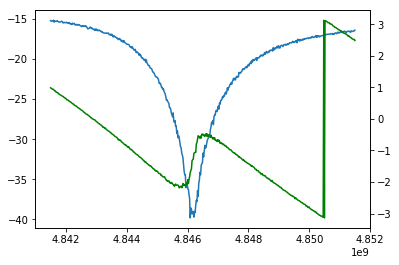

In [721]:
%matplotlib inline
dat = unpack_data(28, ['magnitude_dB', 'frequency', 'phase'])
plt.figure()
plt.plot(dat['frequency'][:], dat['magnitude_dB'][:])
plt.twinx()
plt.plot(dat['frequency'][:], dat['phase'][:], 'g')

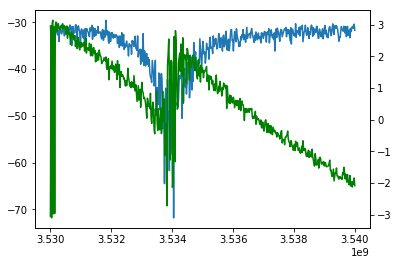

In [722]:
dat = unpack_data(17, ['magnitude_dB', 'frequency', 'phase'])
plt.figure()
plt.plot(dat['frequency'][:], dat['magnitude_dB'][:])
plt.twinx()
plt.plot(dat['frequency'][:], dat['phase'][:], 'g')

([<matplotlib.axes._subplots.AxesSubplot at 0x1705ac62d30>,
 [None, None, None])

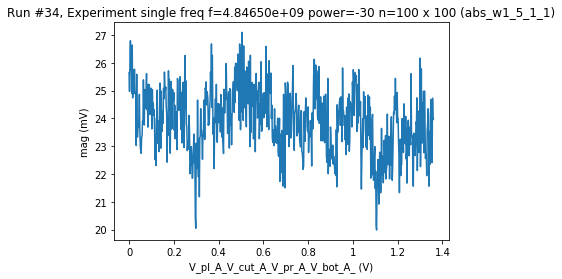

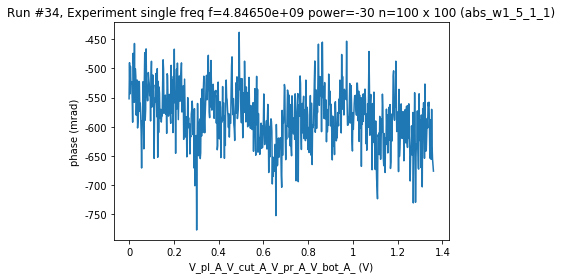

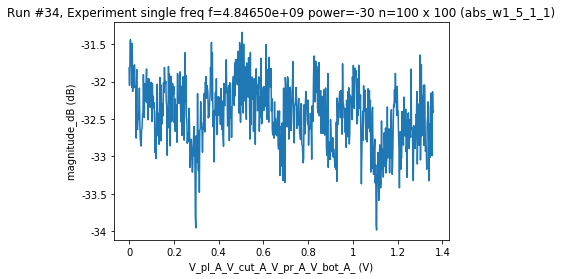

In [723]:
plot_by_id(34)

([<matplotlib.axes._subplots.AxesSubplot at 0x1705addc780>,
  <matplotlib.colorbar.Colorbar at 0x1705d669518>])

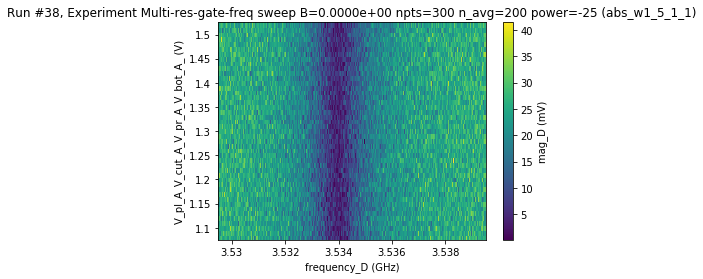

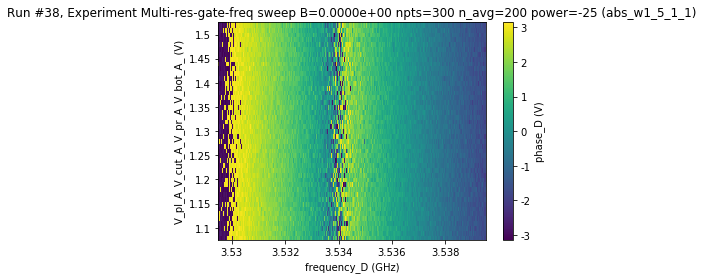

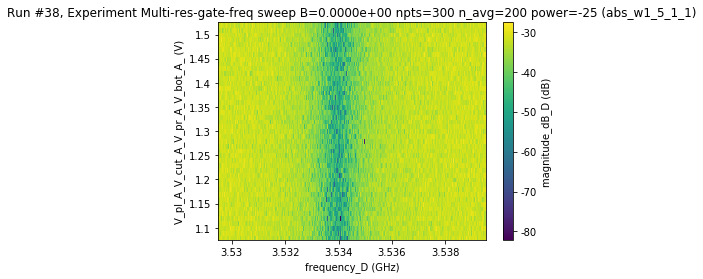

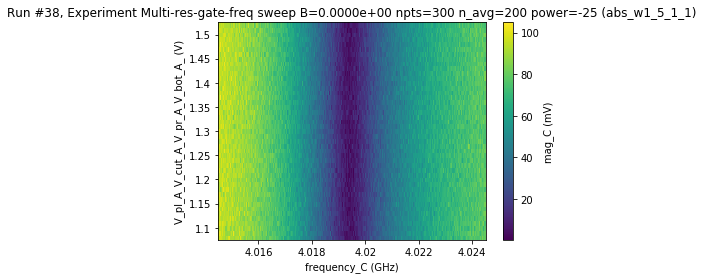

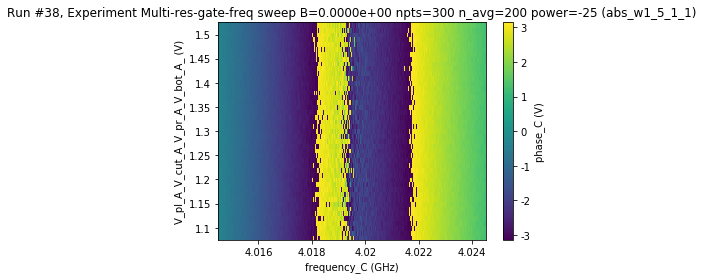

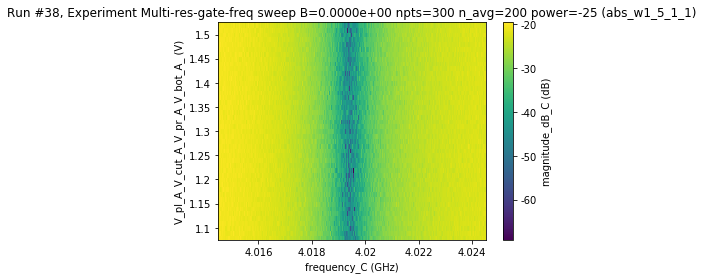

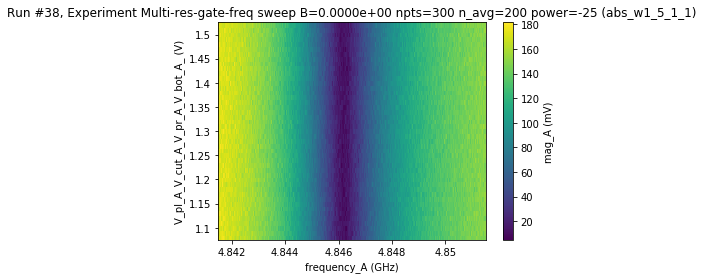

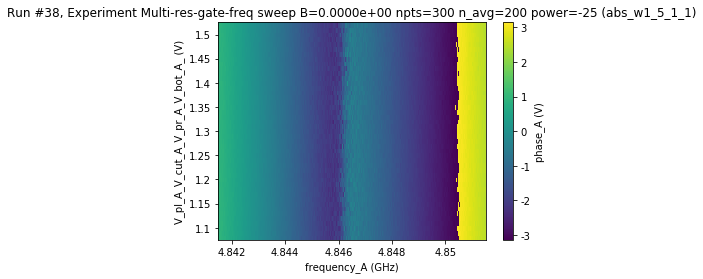

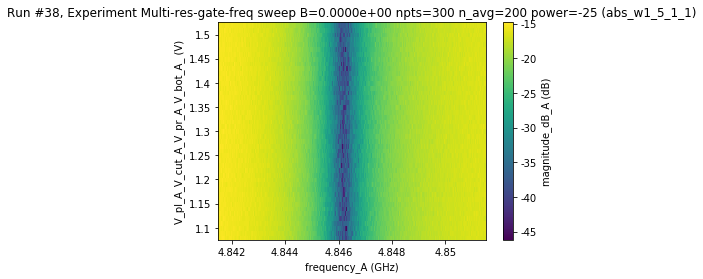

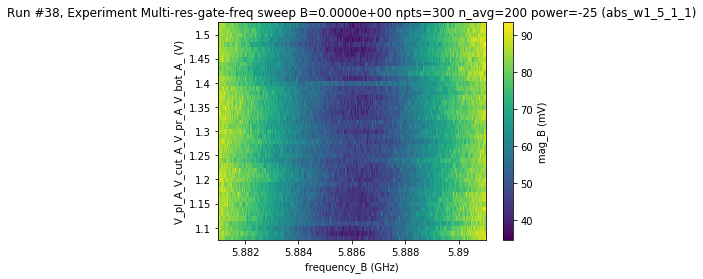

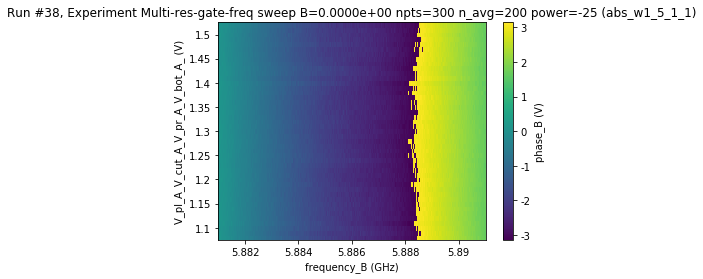

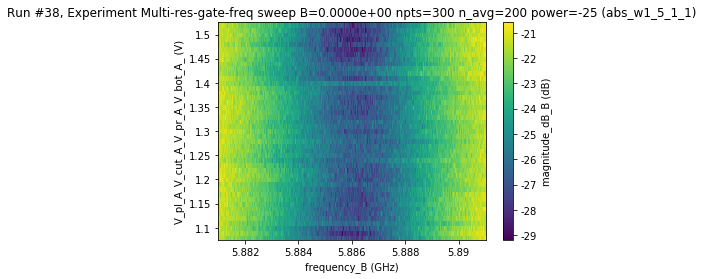

In [724]:
plot_by_id(38)

(-2.5, -1)

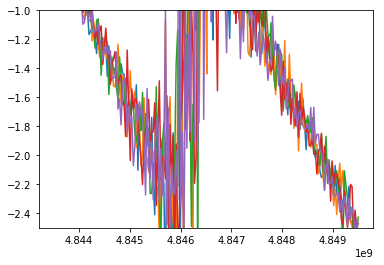

In [726]:
dat = load_by_id(39)
freqs = np.squeeze(dat.get_data('frequency'))
mags = np.squeeze(dat.get_data('phase'))
plt.figure()
plt.plot(freqs[0,:],mags[0,:])
plt.plot(freqs[4,:],mags[1,:])
plt.plot(freqs[7,:],mags[2,:])
plt.plot(freqs[7,:],mags[3,:])
plt.plot(freqs[7,:],mags[4,:])
plt.ylim(-2.5,-1)

TypeError: Invalid dimensions for image data

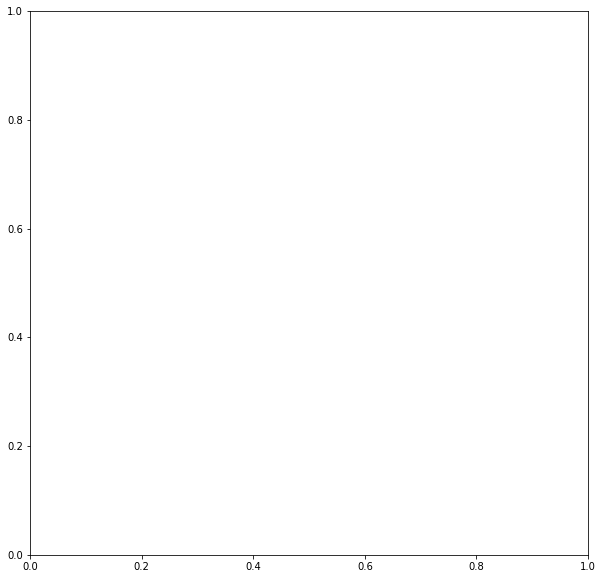

In [727]:
dat = load_by_id(41)
freqs = np.squeeze(dat.get_data('frequency'))
mags = np.squeeze(dat.get_data('phase'))
plt.figure(figsize=(10,10))
plt.imshow(mags, aspect='auto')


([<matplotlib.axes._subplots.AxesSubplot at 0x1705e9f1470>,
  <matplotlib.colorbar.Colorbar at 0x1705ee0cb00>])

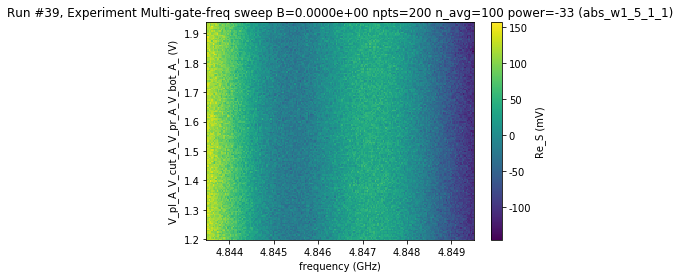

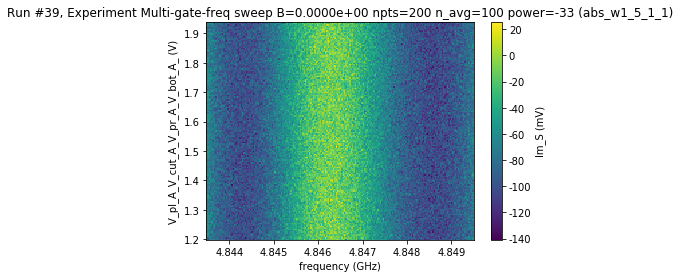

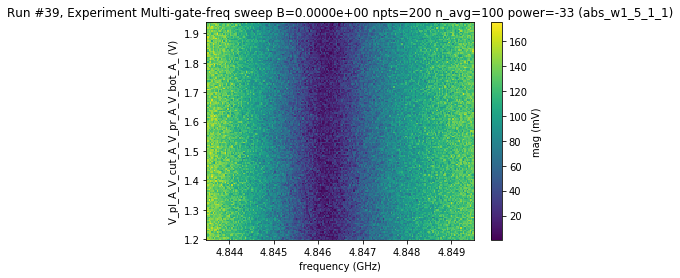

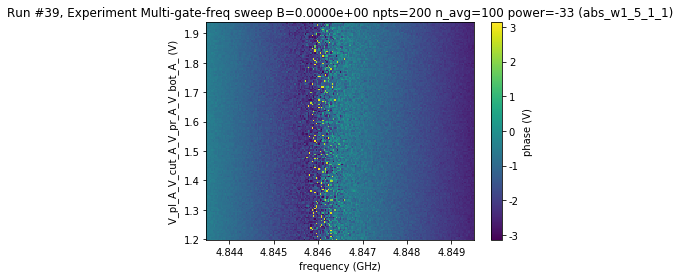

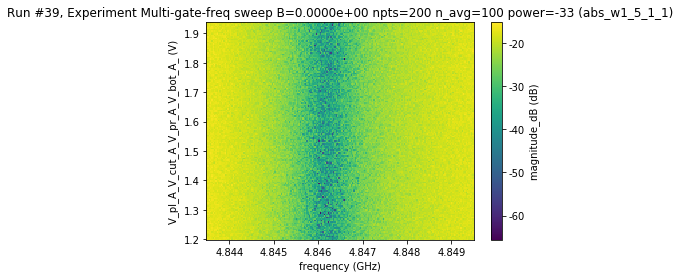

In [728]:
plot_by_id(39)

([<matplotlib.axes._subplots.AxesSubplot at 0x1705ea24cc0>,
  <matplotlib.colorbar.Colorbar at 0x1706111e208>])

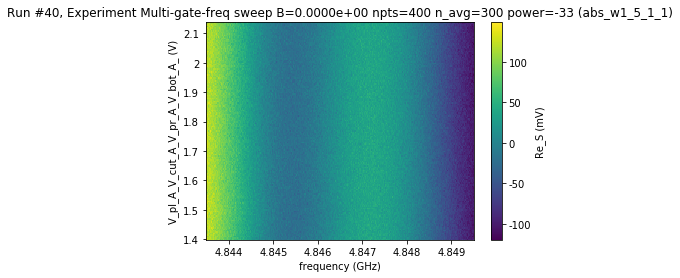

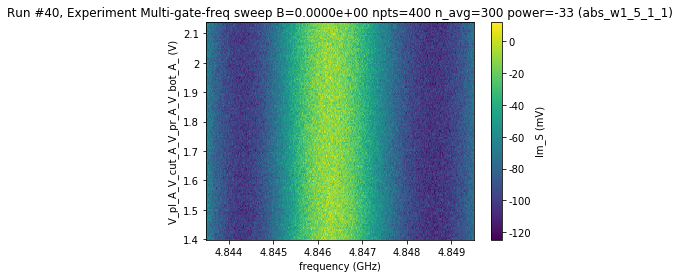

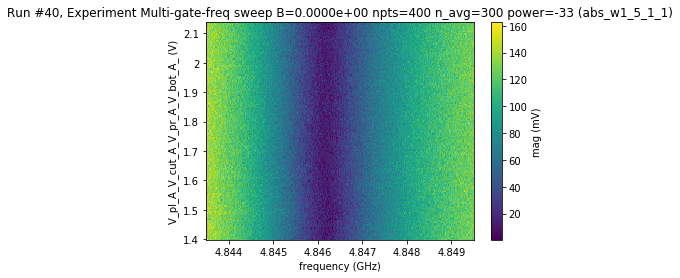

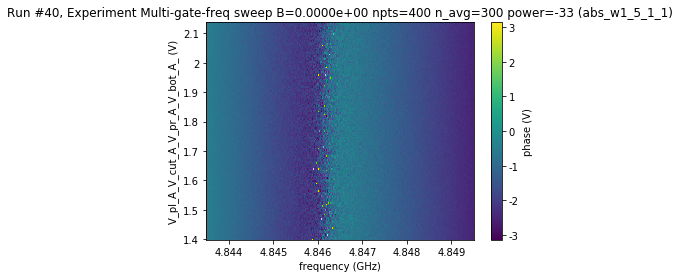

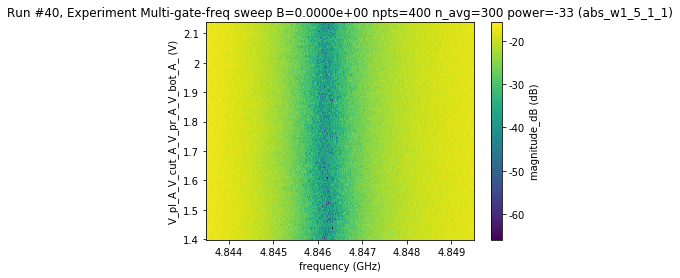

In [729]:
plot_by_id(40)

([<matplotlib.axes._subplots.AxesSubplot at 0x17061951860>,
 [None, None, None, None, None, None, None, None, None, None, None, None])

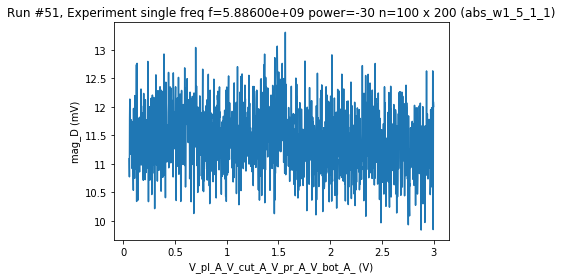

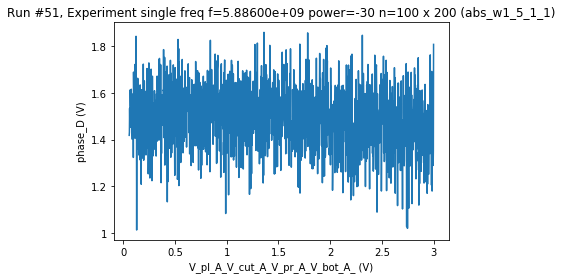

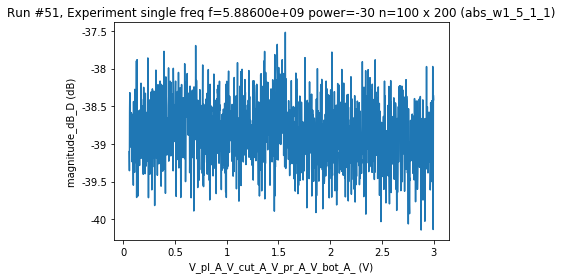

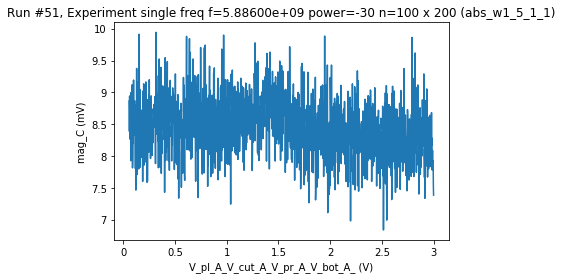

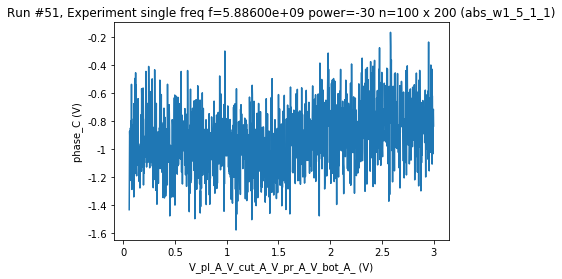

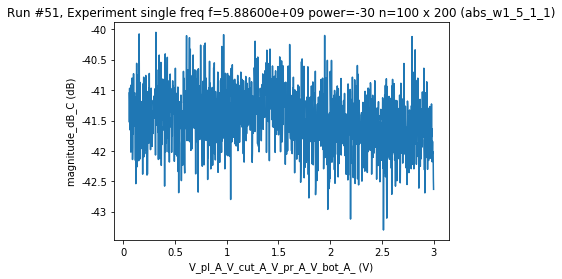

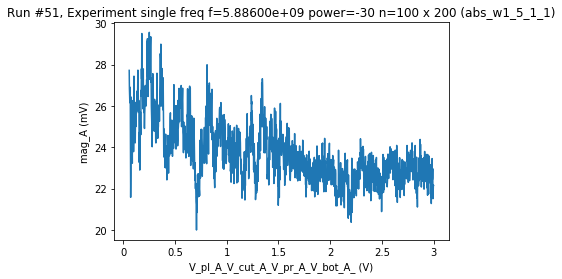

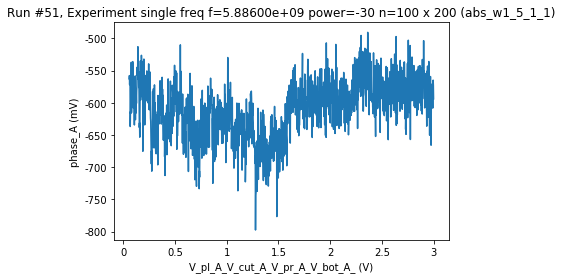

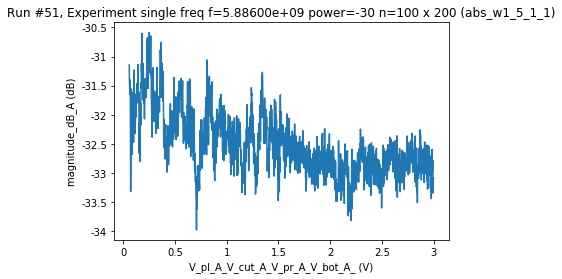

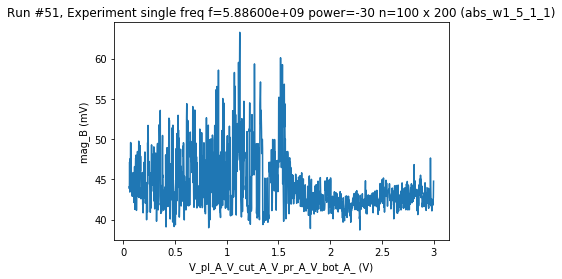

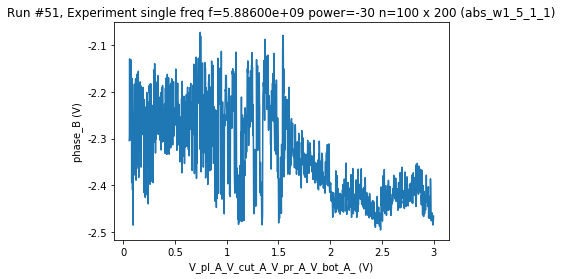

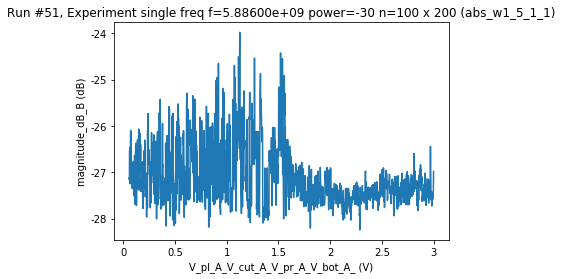

In [730]:
plot_by_id(51)

In [731]:
len(np.arange(0,3,0.002)) * 10 / 60 / 60

4.166666666666667

([<matplotlib.axes._subplots.AxesSubplot at 0x17062f71668>,
 [None, None, None, None, None, None, None, None, None, None, None, None])

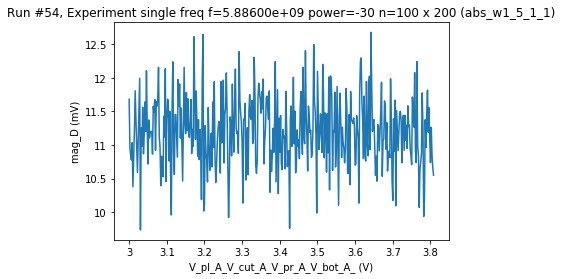

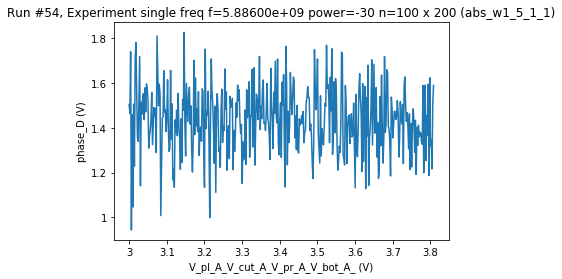

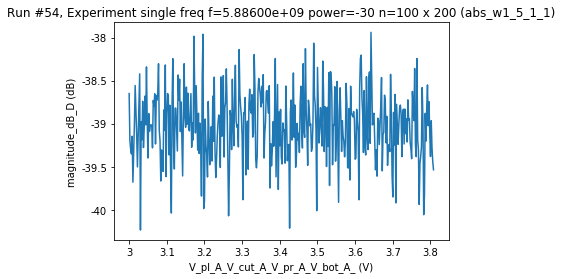

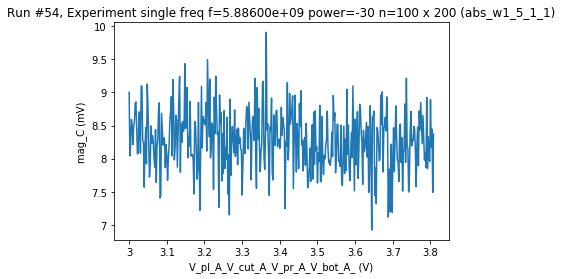

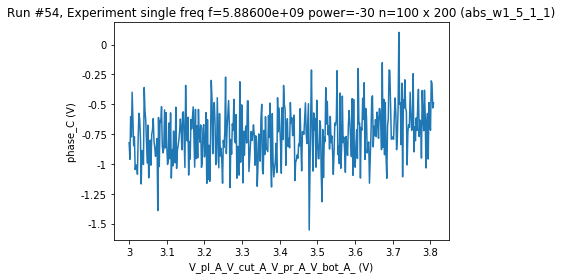

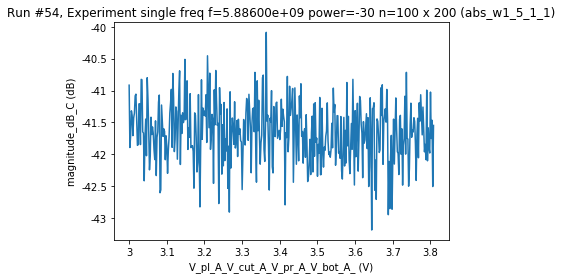

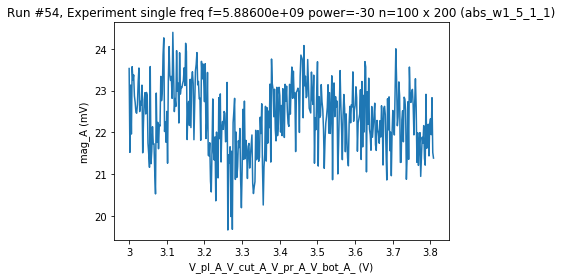

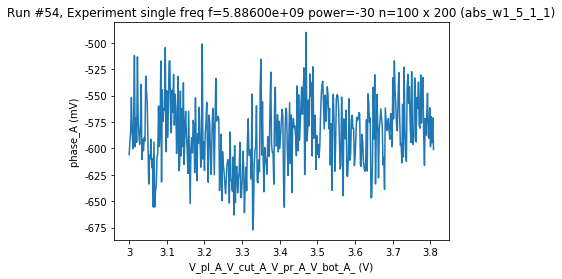

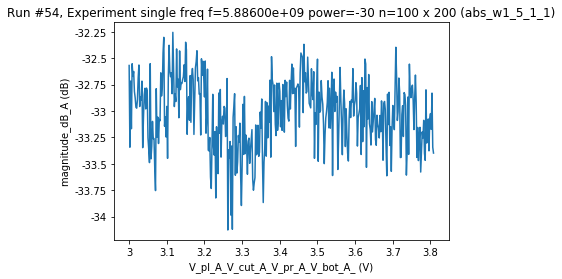

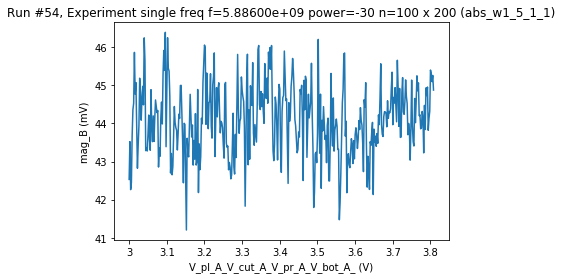

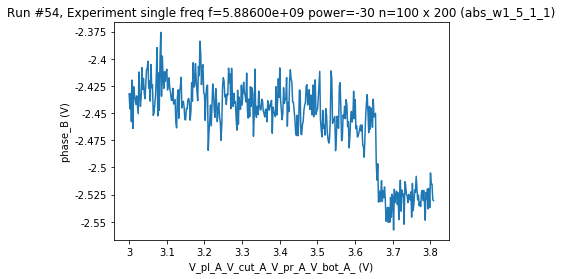

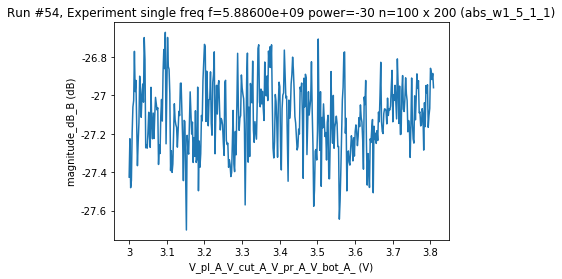

In [732]:
plot_by_id(54)

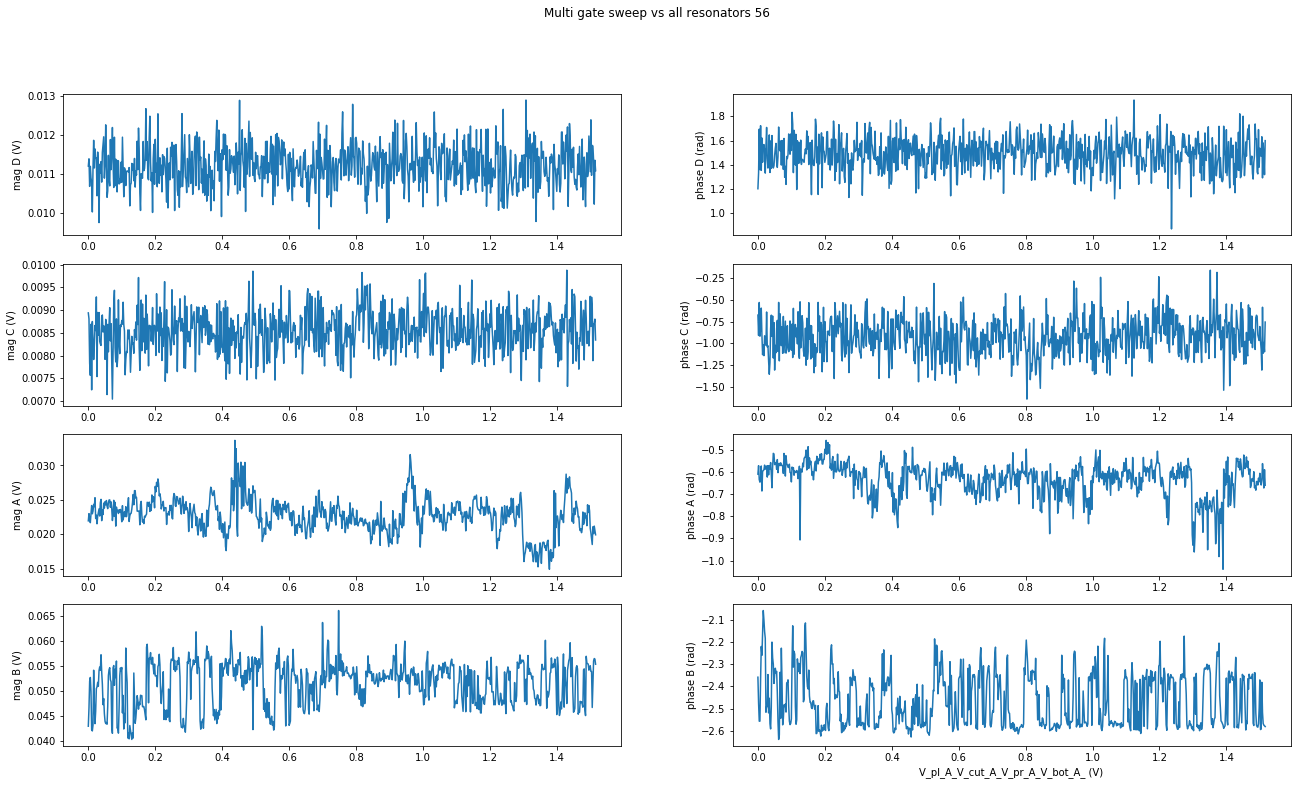

In [733]:
run_id=56
dat = load_by_id(run_id)
resonators = ['D', 'C', 'A', 'B']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(22,12))
i=1
for res in resonators:
    plt.subplot(4,2,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag_'+res))
    phase = np.squeeze(dat.get_data('phase_'+res))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(4,2,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

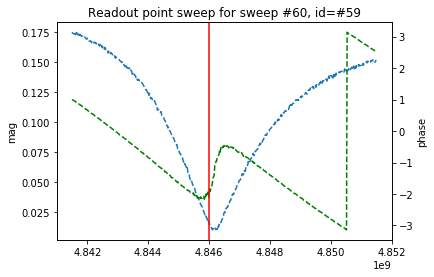

In [734]:
plot_readout_point_from_sweep(59, f_readout=4.846e9)

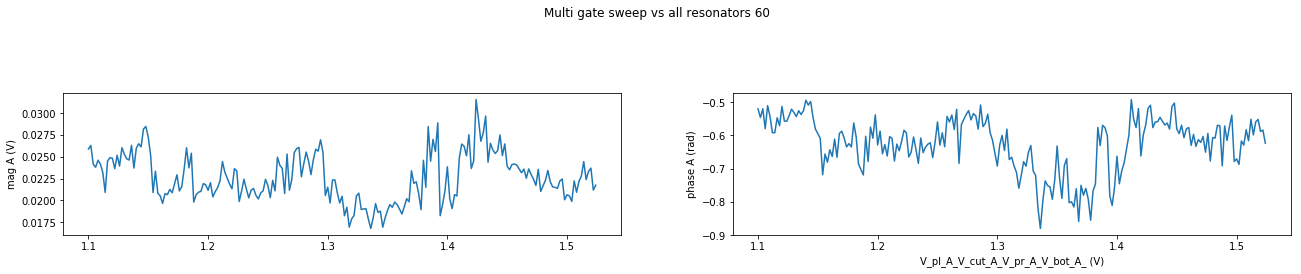

In [735]:
run_id=60
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(22,12))
i=1
for res in resonators:
    plt.subplot(4,2,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag_'+res))
    phase = np.squeeze(dat.get_data('phase_'+res))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(4,2,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

In [744]:
dat = load_by_id(57)
fs = np.squeeze(dat.get_data('frequency'))
print(fs[249])

4846489979.96


In [746]:
dat = load_by_id(5)
plt.plot(np.squeeze(dat.get_data('frequency'))[1,:], np.squeeze(dat.get_data('magnitude_dB'))[8,:])

IndexError: too many indices for array

([<matplotlib.axes._subplots.AxesSubplot at 0x1706850b710>,
  <matplotlib.colorbar.Colorbar at 0x170687a8470>])

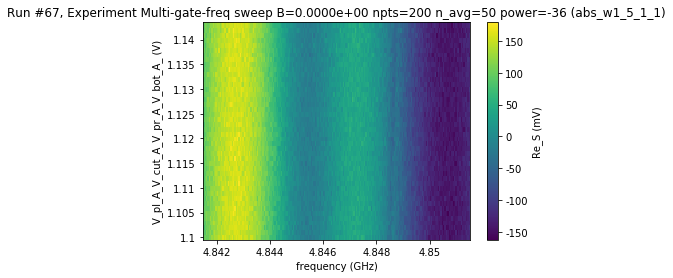

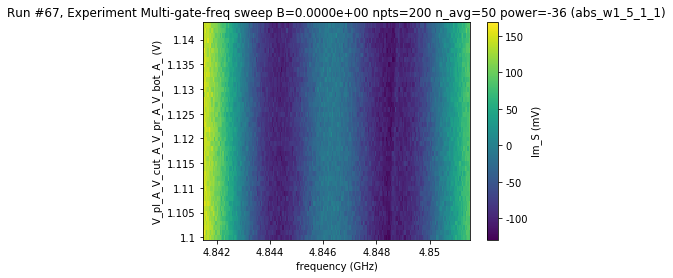

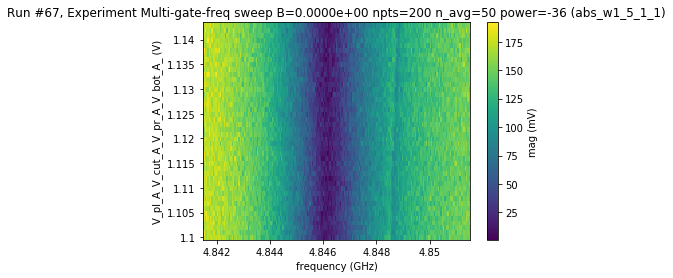

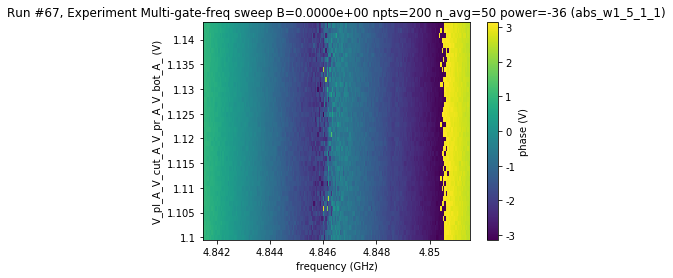

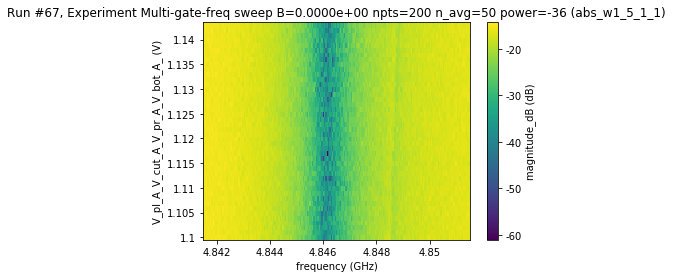

In [747]:
plot_by_id(67)

([<matplotlib.axes._subplots.AxesSubplot at 0x1706840b198>,
 [None, None, None])

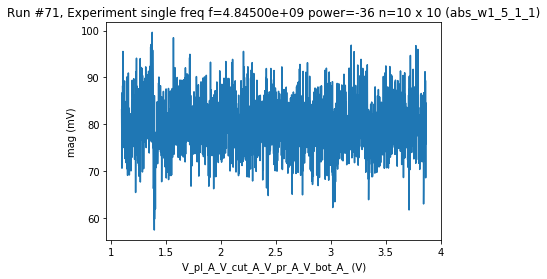

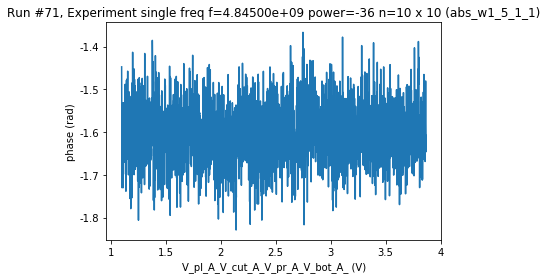

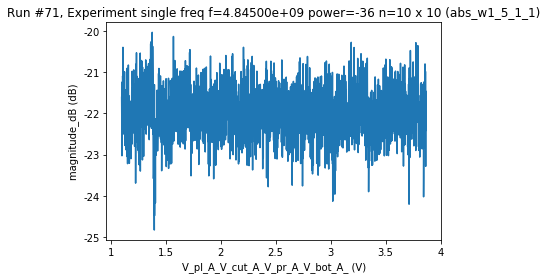

In [748]:
plot_by_id(71)

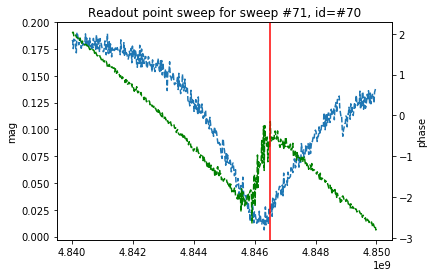

In [745]:
plot_readout_point_from_sweep(70, f_readout=4.8465e9)

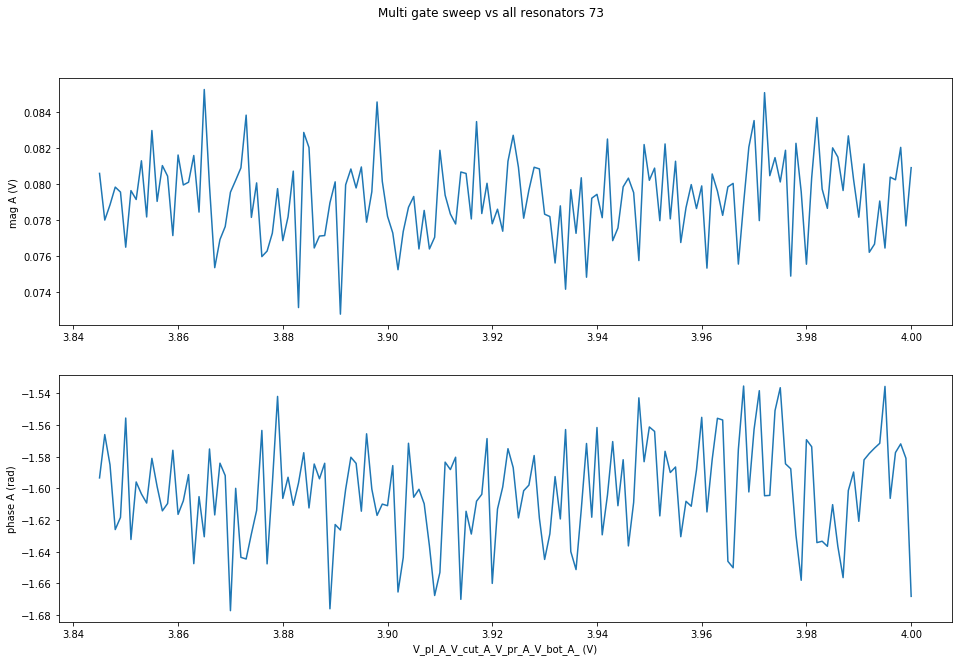

In [751]:
run_id=73
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

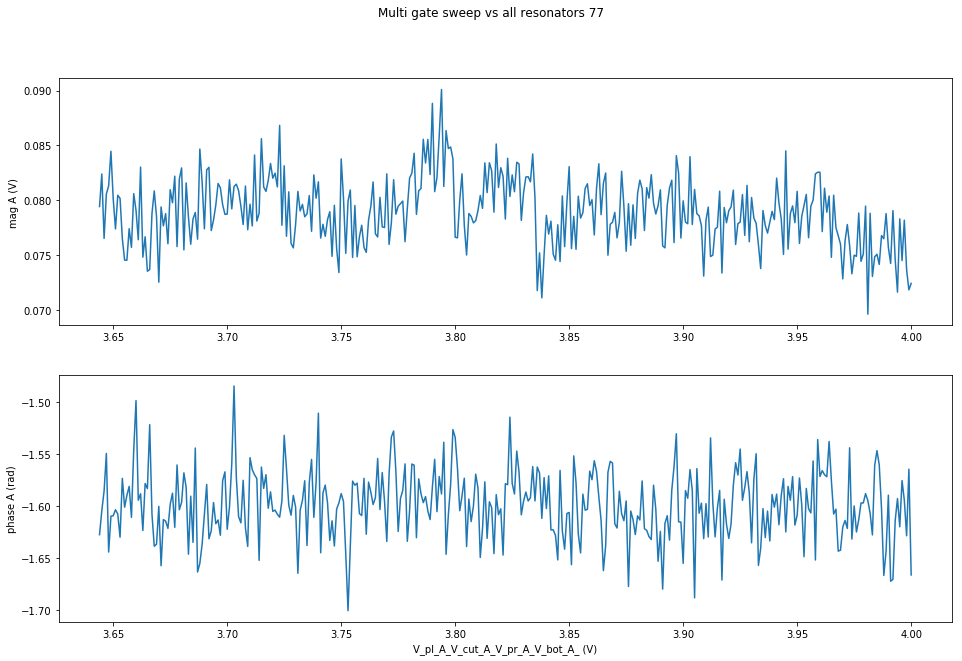

In [716]:
run_id=77
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

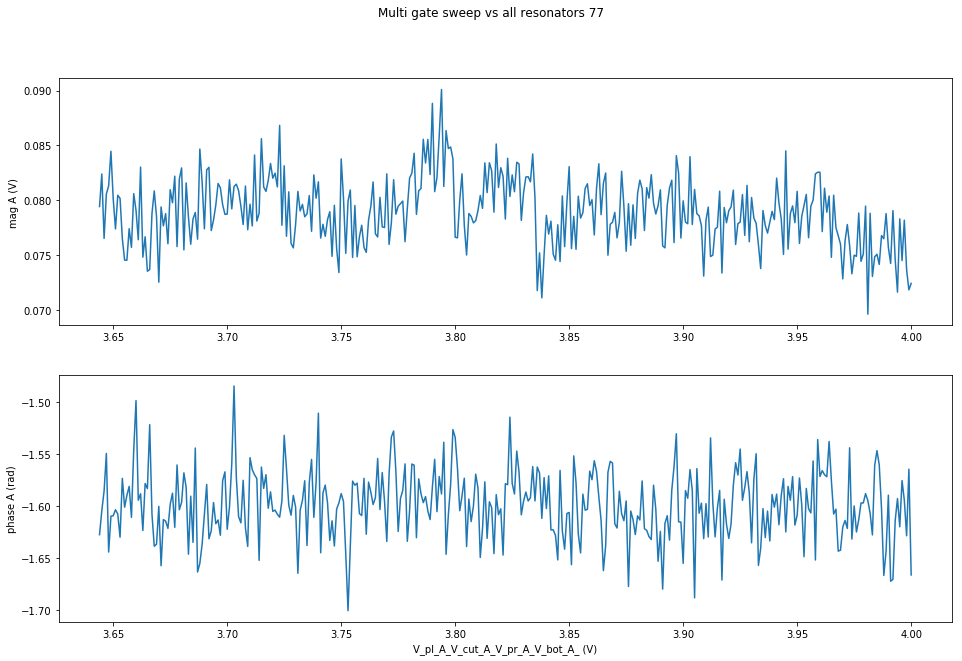

In [717]:
run_id=77
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

## 6-3 from 19:49 onwards data

In [752]:
initialize_database('20190603')

database set to D:\OneDrive\BF3\Data\\20190603_ABS_W1_5_1_1.db


In [ ]:
run_id=1
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

In [ ]:
run_id=2
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

In [ ]:
run_id=3
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

In [ ]:
run_id=4
dat = load_by_id(run_id)
resonators = [ 'A']

gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

In [ ]:
plot_by_id(5)

In [ ]:
plot_by_id(6)

In [ ]:
plot_readout_point_from_sweep(8, f_readout=f0s[0])

In [ ]:
f0s = [3534500000.0, 4019500000.0, 4846500000.0, 5886000000.0]
f0s =  [3533000000.0, 4018000000.0, 4844500000.0, 5884000000.0]

In [ ]:
plot_readout_point_from_sweep(9, f_readout=f0s[1])

In [ ]:
plot_readout_point_from_sweep(10, f_readout=f0s[2])

In [ ]:
plot_readout_point_from_sweep(11, f_readout=f0s[3])

In [ ]:
plot_by_id(16)

In [ ]:
run_id=16
dat = load_by_id(run_id)
resonators = ['D', 'C', 'A', 'B']

#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(22,12))
i=1
for res in resonators:
    plt.subplot(4,2,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag_'+res))
    phase = np.squeeze(dat.get_data('phase_'+res))
    plt.ylabel('mag '+res+' (V)')
    plt.plot(gate_voltages, mag)
    plt.subplot(4,2,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs all resonators %d'% run_id)

plt.savefig('temp')

In [ ]:
plot_by_id(22)

In [ ]:
run_id=22
dat = load_by_id(run_id)
resonators = [ 'C']

#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    plt.xlim(2,4)
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs res C #%d'% run_id)

plt.savefig('temp')


In [ ]:
run_id=30
dat = load_by_id(run_id)
resonators = [ 'C']

#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    #plt.xlim(2,4)
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages, phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Multi gate sweep vs res C #%d'% run_id)

plt.savefig('temp')


In [ ]:
plot_by_id(34)

In [ ]:
plot_by_id(38)

In [ ]:
dat = unpack_data(38)
plt.figure()
plt.plot(dat['frequency'][0,:], dat['mag'][0,:])
plt.figure()
plt.plot(dat['frequency'][0,:], dat['phase'][0,:])

In [ ]:
plt.plot(get_f0s_from_data(33) * 1e-9)
plt.plot(get_f0s_from_data(34) * 1e-9)

In [ ]:
dat

In [ ]:
f_readouts=  [3533000000.0, 4018000000.0, 4844500000.0, 5884000000.0]
print(f_readouts[2])

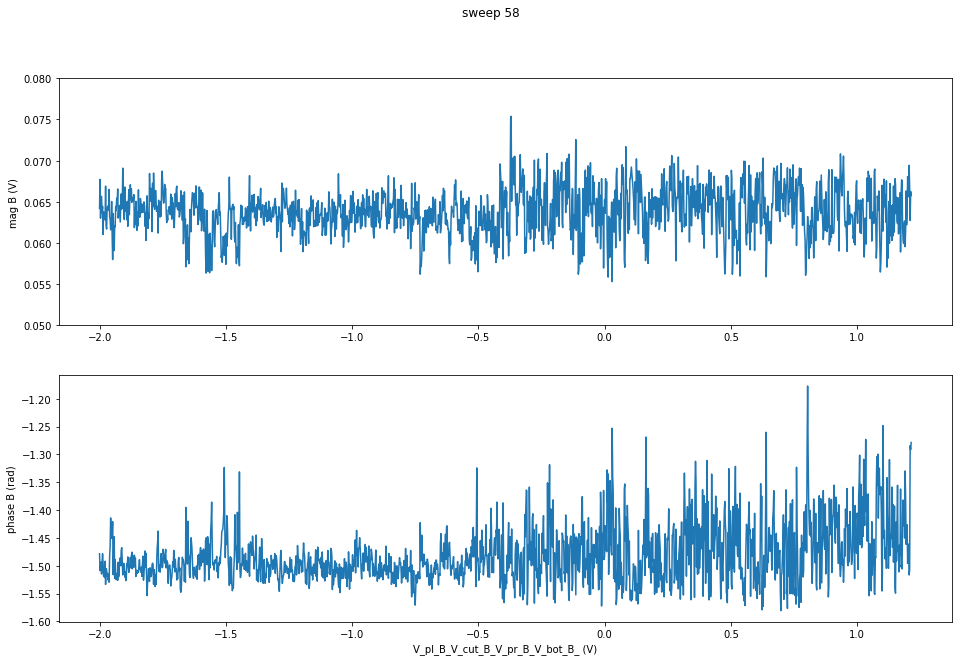

In [708]:
run_id=58
dat = load_by_id(run_id)
resonators = [ 'B']
#gate='V_bot_A_'
#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    #plt.xlim(2,4)
    plt.ylim(0.05,0.08)
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages,phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('sweep %d'% run_id)

plt.savefig('temp')


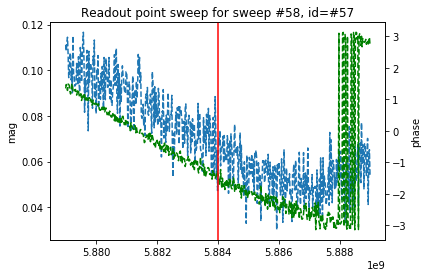

In [709]:
plot_readout_point_from_sweep(57, f_readout=f0s[3])


In [ ]:
plot_by_id(58)

([<matplotlib.axes._subplots.AxesSubplot at 0x170564b2cf8>,
 [None, None, None])

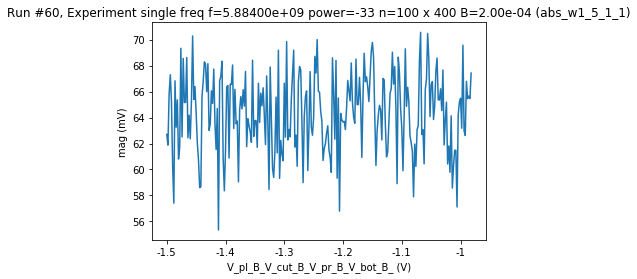

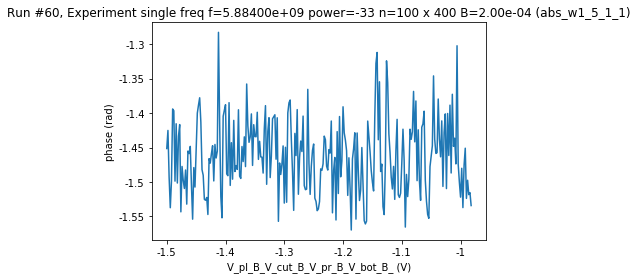

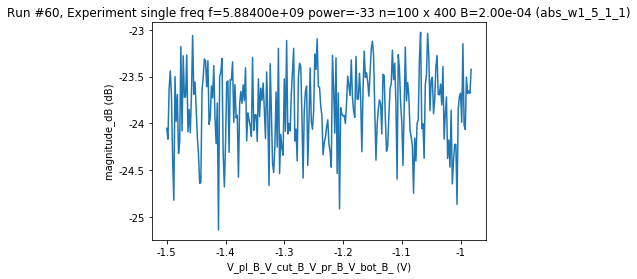

In [701]:
plot_by_id(60)

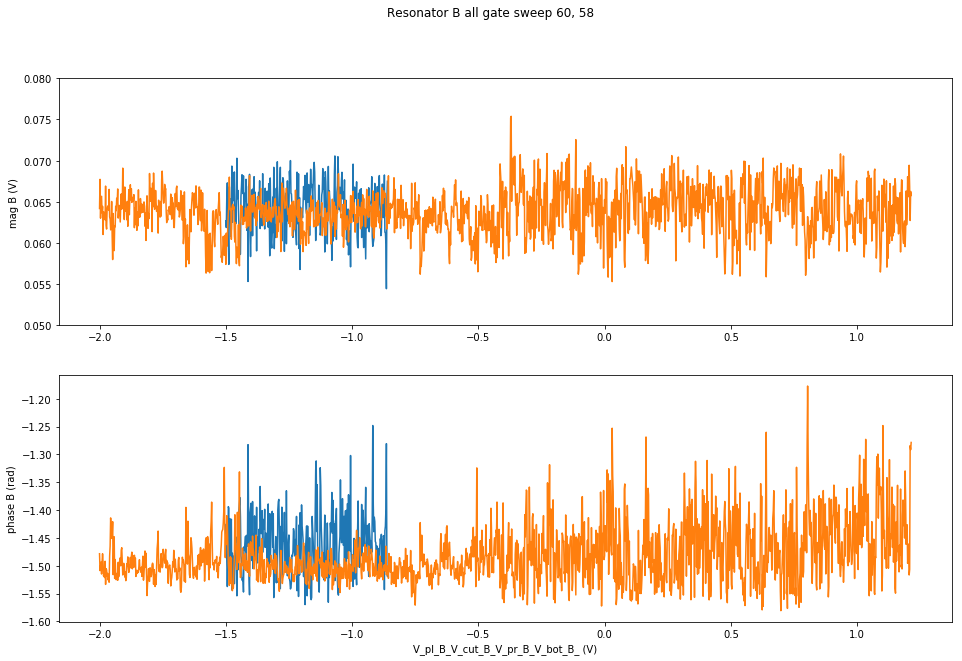

In [706]:
run_id=60
run_id2=58
dat = load_by_id(run_id)
dat2 = load_by_id(run_id2)
resonators = [ 'B']
#gate='V_bot_A_'
#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    gate_voltages2 = np.squeeze(dat2.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    mag2 = np.squeeze(dat2.get_data('mag'))
    phase = np.squeeze(dat.get_data('phase' ))
    phase2 = np.squeeze(dat2.get_data('phase'))
    plt.ylabel('mag '+res+' (V)')
    #plt.xlim(2,4)
    plt.ylim(0.05,0.08)
    plt.plot(gate_voltages, mag)
    plt.plot(gate_voltages2,mag2)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages,phase)
    plt.plot(gate_voltages2,phase2)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('Resonator B all gate sweep %d, 58'% run_id)

plt.savefig('temp')

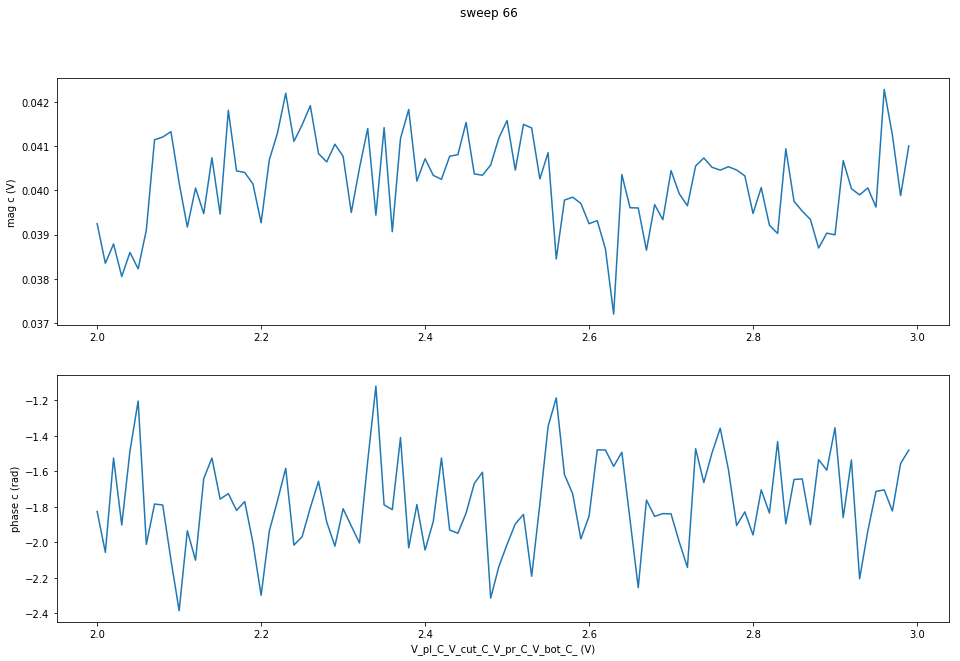

In [810]:
run_id=70
dat = load_by_id(run_id)
resonators = [ 'c']
#gate='V_bot_A_'
#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    #plt.xlim(2,4)
    #plt.ylim(0.05,0.08)
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages,phase)
    plt.ylabel('phase '+res+' (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('sweep %d'% run_id)

plt.savefig('temp')


([<matplotlib.axes._subplots.AxesSubplot at 0x1707a080a58>,
 [None, None, None])

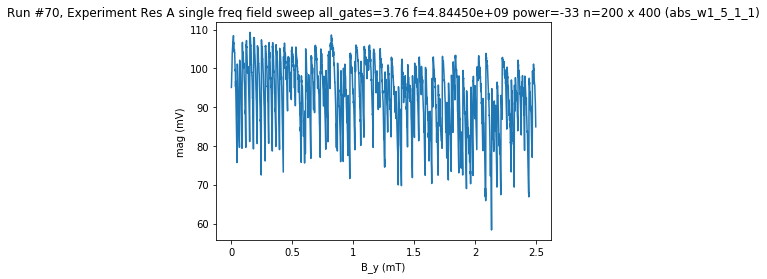

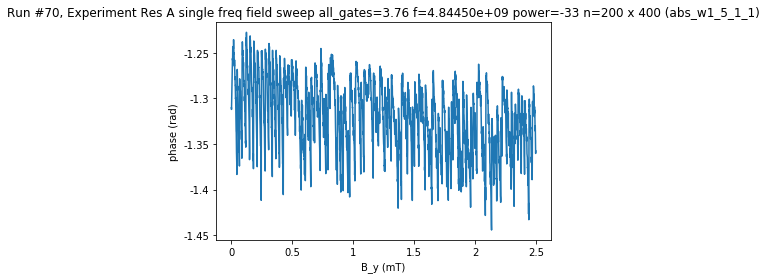

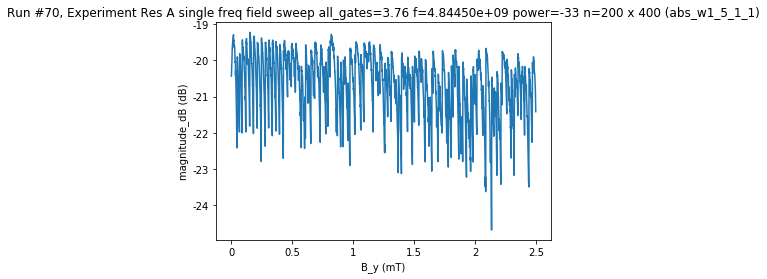

In [830]:
plot_by_id(70)

In [828]:

B_fields = np.append(np.append(np.append(np.arange(0,0.2e-3,1e-6), np.arange(0.2e-3,-0.2e-3,-1e-6)), np.arange(-0.2e-3,0.2e-3,1e-6)), np.arange(0.2e-3,-0.2e-3,-1e-6))

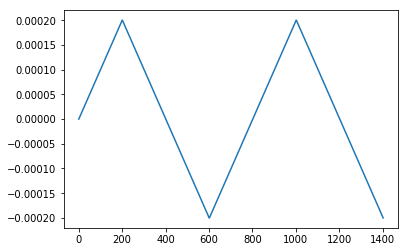

In [829]:
plt.plot(B_fields)

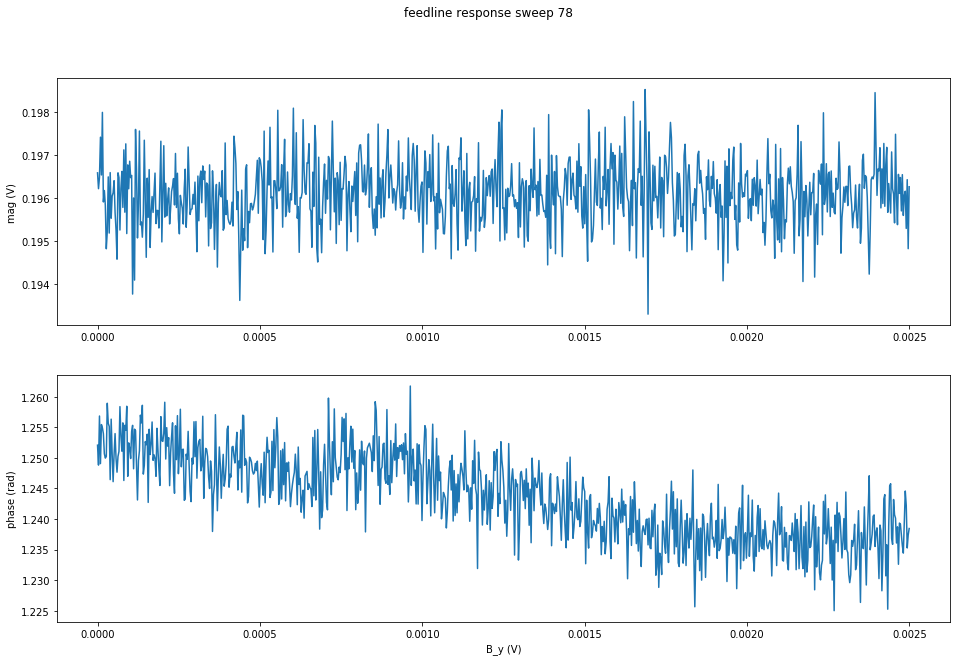

In [876]:
run_id=78
dat = load_by_id(run_id)
resonators = [ 'A']
#gate='V_bot_A_'
#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
gate='B_y'
plt.figure(figsize=(16,10))
i=1
for res in resonators:
    plt.subplot(2,1,i)
    gate_voltages = np.squeeze(dat.get_data(gate))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag (V)')
    #plt.xlim(2,4)
    #plt.ylim(0.05,0.08)
    plt.plot(gate_voltages, mag)
    plt.subplot(2,1,i+1)
    plt.plot(gate_voltages,phase)
    plt.ylabel('phase (rad)')
    i=i+2
plt.xlabel(gate +' (V)')
plt.suptitle('feedline response sweep %d'% run_id)

plt.savefig('temp')

([<matplotlib.axes._subplots.AxesSubplot at 0x1706a14ecf8>,
 [None, None, None])

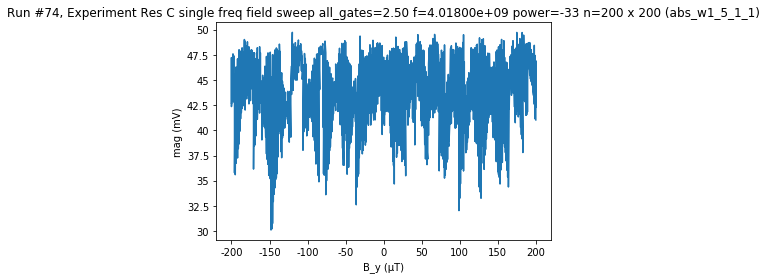

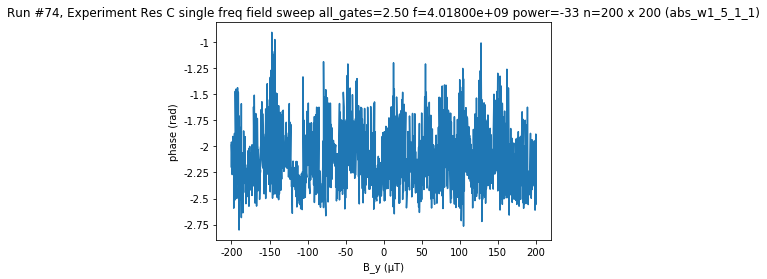

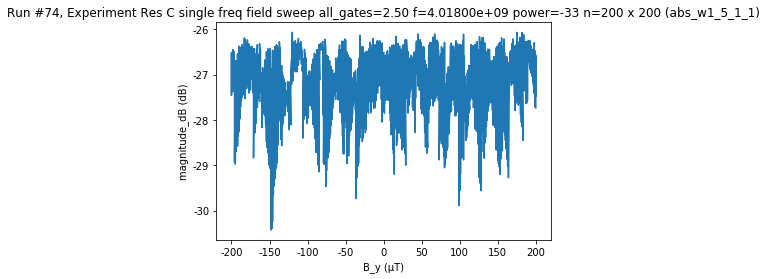

In [844]:
plot_by_id(74)


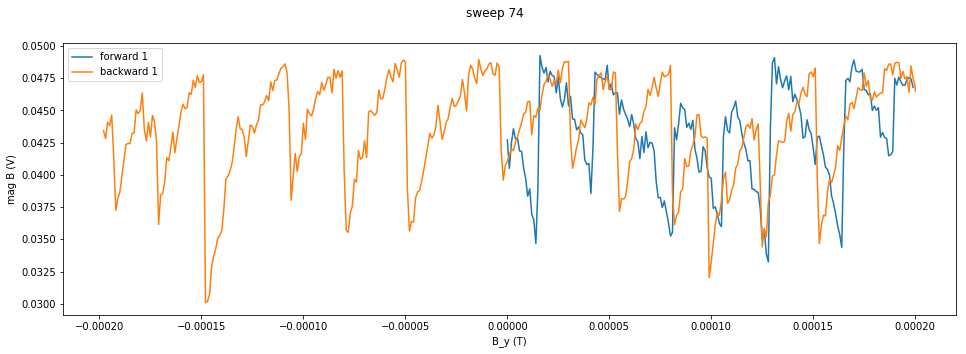

In [886]:
run_id=74
run_id_2 = 74
dat = load_by_id(run_id)
dat2 = load_by_id(run_id_2)
resonators = [ 'B']
#gate='V_bot_A_'
#gate= 'V_pl_A_V_cut_A_V_pr_A_V_bot_A_'
#gate= 'V_pl_B_V_cut_B_V_pr_B_V_bot_B_'
#gate= 'V_pl_C_V_cut_C_V_pr_C_V_bot_C_'
field_col='B_y'
plt.figure(figsize=(16,5))
for res in resonators:
    fields = np.squeeze(dat.get_data(field_col))
    mag = np.squeeze(dat.get_data('mag' ))
    phase = np.squeeze(dat.get_data('phase' ))
    plt.ylabel('mag '+res+' (V)')
    
    #get the highsest index since we swept back and forth:
    i_up = np.argmax(fields)
    plt.plot(fields[0:i_up], mag[0:i_up])
    plt.plot(fields[i_up:3*i_up], mag[i_up:3*i_up])
    #plt.plot(fields[3*i_up:5*i_up], mag[3*i_up:5*i_up])
    #plt.plot(fields[5*i_up:7*i_up], mag[5*i_up:7*i_up])
    plt.legend(['forward 1', 'backward 1',' forward 2', 'backward 2', 'forward 3'])
    #plt.xlim(2,4)
    #plt.ylim(0.05,0.08)
    #plt.plot(mag)
plt.xlabel(field_col +' (T)')
plt.suptitle('sweep %d'% run_id)

plt.savefig('temp')

In [854]:
np.argmax(fields)

200

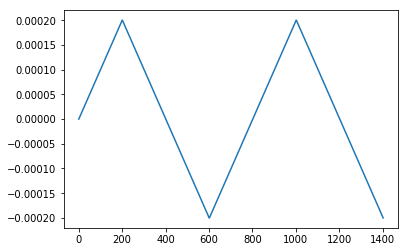

In [855]:
plt.plot(fields)

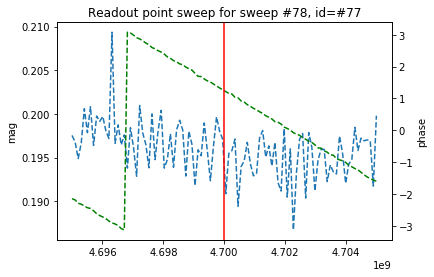

In [870]:
plot_readout_point_from_sweep(77, f_readout=4.7e9)

([<matplotlib.axes._subplots.AxesSubplot at 0x1703ca5e9e8>,
 [None, None, None])

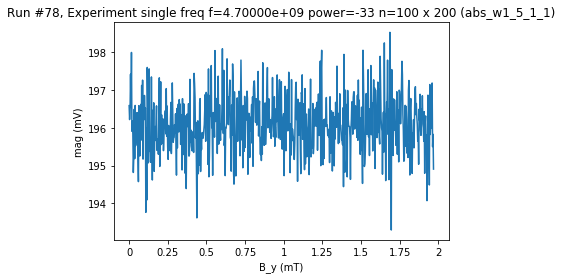

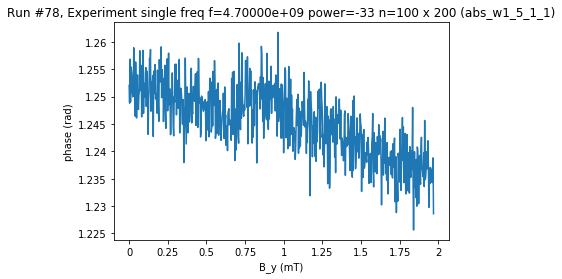

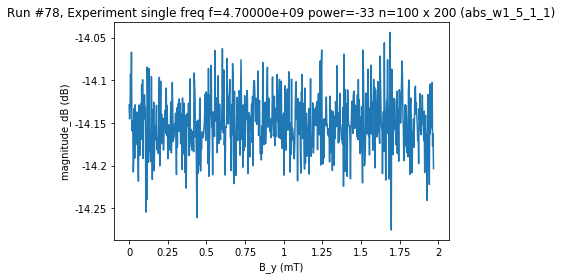

In [874]:
plot_by_id(78)

([<matplotlib.axes._subplots.AxesSubplot at 0x17077c08710>,
 [None, None, None, None])

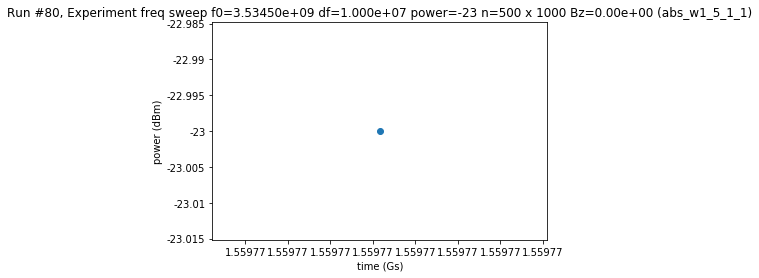

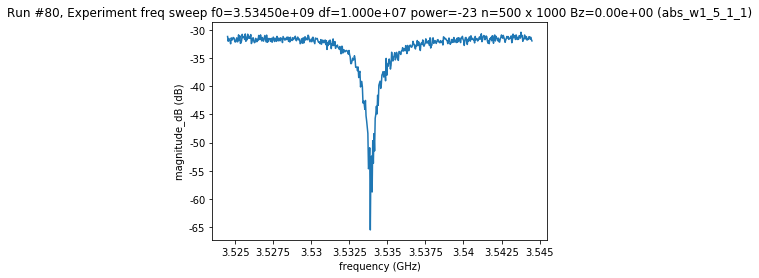

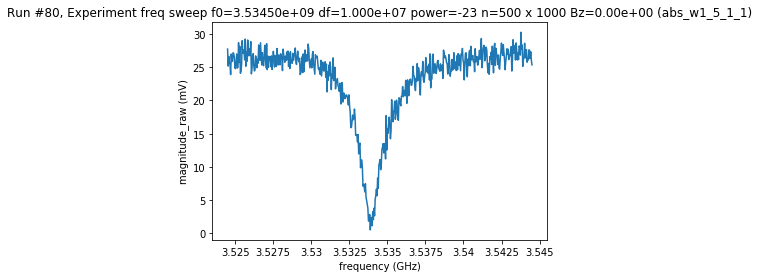

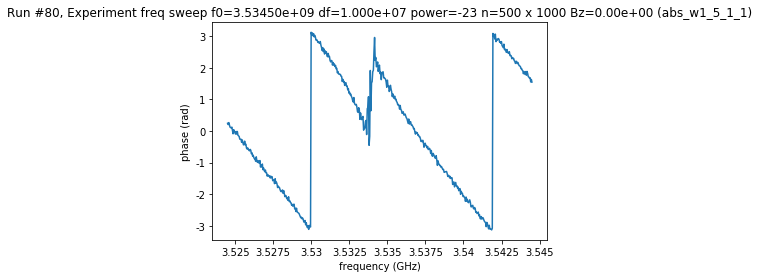

In [889]:
plot_by_id(80)

Text(0,0.5,'Magnitude (dB)')

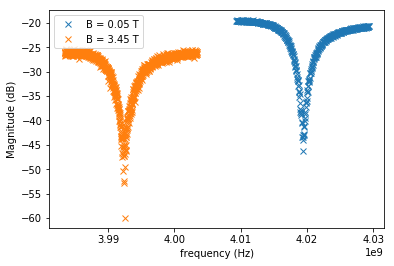

In [1016]:
dat = unpack_data(87, ['magnitude_dB', 'frequency', 'yoko_magnet_z'])
plt.plot(dat['frequency'],dat['magnitude_dB'],'x', label='B = %.2f T' %dat['yoko_magnet_z' ])
dat = unpack_data(375, ['magnitude_dB', 'frequency', 'yoko_magnet_z'],
                )
plt.plot(dat['frequency'],dat['magnitude_dB'],'x',  label='B = %.2f T' %dat['yoko_magnet_z' ])
plt.legend()
plt.xlabel('frequency (Hz)')
plt.ylabel('Magnitude (dB)')